# Homework 4. Frequent Words and Web scraping

***Double Click here to edit this cell***

- Name: 서다원
- Student ID: 202001707
- Submission date: 2022.05.13

## Problem 1 (15 pts)

- Project Gutenberg is a volunteer effort to digitize and archive cultural works.
- Moby-Dick is an 1851 novel by American writer Herman Melville.
- You can find Moby-Dick in an ordinary text format at https://www.gutenberg.org/files/2701/old/moby10b.txt
- Use **requests** module to get the text.


- We want to compute word frequency of words appearing in mobydick and generate WordCloud
    - First, you must split the text into words. 
    - **Any symbols(!, ., ?, ,, +, -, *, ...)** are delimeters
    - Numbers should not be words. 
    - Null string is not a word. 
    - Any delimiters should not be words.
    - To split into words, use **re** (regular expression module)
    - (Upper or lower) Cases does not matter in words

### 1.1 Print top 50 most common words (5 pts)

In [ ]:
# YOUR CODE MUST BE HERE
import requests, re
import numpy as np
from collections import Counter

url = "https://www.gutenberg.org/files/2701/old/moby10b.txt"
mobydick_text = requests.get(url).text
split_text = re.split(r"[\b\W\b]+", mobydick_text)  #Non-alphanumeric delimiters
data = np.array(split_text)
for i, document in enumerate(data):
  document = re.sub(r'[^ 가-힣A-Za-z]', '', document)
  data[i] = document.lower()
data = list(filter(None,data)) #remove null string
Counter = Counter(data)
most_occur = Counter.most_common(50) #50개 출력
print(most_occur)


[('the', 14512), ('of', 6676), ('and', 6471), ('a', 4774), ('to', 4690), ('in', 4190), ('that', 3095), ('it', 2542), ('his', 2530), ('i', 2128), ('he', 1896), ('but', 1823), ('s', 1811), ('as', 1750), ('is', 1748), ('with', 1729), ('was', 1647), ('for', 1643), ('all', 1537), ('this', 1437), ('at', 1332), ('by', 1232), ('whale', 1228), ('not', 1162), ('from', 1103), ('on', 1077), ('so', 1073), ('him', 1067), ('be', 1058), ('you', 949), ('one', 934), ('there', 870), ('now', 787), ('had', 779), ('have', 773), ('or', 761), ('were', 685), ('they', 669), ('which', 650), ('like', 648), ('me', 634), ('then', 632), ('some', 621), ('what', 620), ('their', 620), ('are', 611), ('when', 608), ('an', 600), ('no', 592), ('my', 589)]


 **Your output should be like the following**:
 ```python
[('the', 14512), ('of', 6676), ('and', 6471), ('a', 4774), ('to', 4690), ('in', 4190), ('that', 3095), ('it', 2542), ('his', 2530), ('i', 2128), ('he', 1896), ('but', 1823), ('s', 1811), ('as', 1750), ('is', 1748), ('with', 1729), ('was', 1647), ('for', 1643), ('all', 1537), ('this', 1437), ('at', 1332), ('by', 1232), ('whale', 1228), ('not', 1162), ('from', 1103), ('on', 1077), ('so', 1073), ('him', 1067), ('be', 1058), ('you', 949), ('one', 934), ('there', 870), ('now', 787), ('had', 779), ('have', 773), ('or', 761), ('were', 685), ('they', 669), ('which', 650), ('like', 648), ('me', 634), ('then', 632), ('some', 621), ('what', 620), ('their', 620), ('are', 611), ('when', 608), ('an', 600), ('no', 592), ('my', 589)]
```

### 1.2 Plot word frequency (5 pts)

- Sort the word frequency in descending order
- Plot the word frequency
- Plot the word frequency in log-log plot.

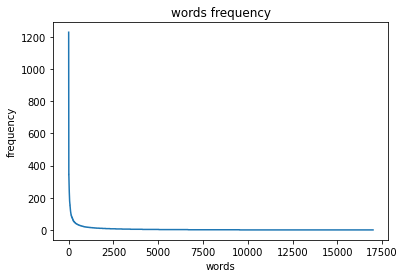

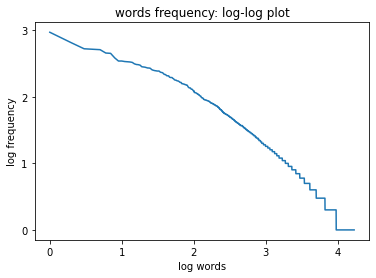

In [ ]:
# YOUR CODE MUST BE HERE
import matplotlib.pyplot as plt

counter = sorted(Counter.most_common(), key=lambda count: count[1], reverse=True) #count 기준으로 정렬
#print(counter)
data_words = [x[0] for x in counter]
#print(data_words)
words_counts = [x[1] for x in counter]
#print(words_counts)
index = np.arange(len(data_words))
plt.xlabel('words')
plt.ylabel('frequency')
plt.title('words frequency')
plt.plot(index, words_counts)

plt.show()


plt.yticks(np.arange(0,5))
plt.xlabel('log words')
plt.ylabel('log frequency')
plt.title('words frequency: log-log plot')
plt.plot(np.log10(index), np.log10(words_counts))

plt.show()

**Your output should be like**:







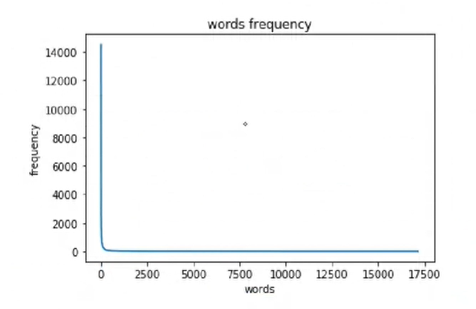

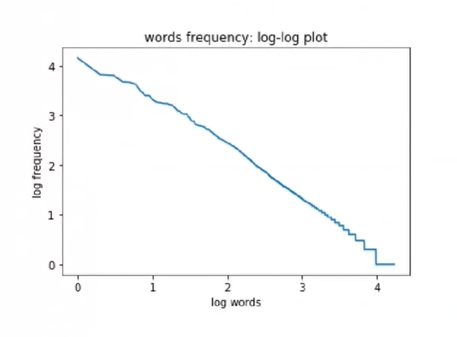

### Discussion

- Read this wikipedia article : https://ko.wikipedia.org/wiki/%EC%A7%80%ED%94%84%EC%9D%98_%EB%B2%95%EC%B9%99)
- Discuss what you learned from the distribution.


```
WRITE HERE (To edit, double click this cell)

지프의 법칙은 많은 종류의 정보들이 지프 분포에 가까운 경향을 보인다는 것이다. 
여기서 지프 분포는 확률 분포중에 하나인데 
어떠한 자연어 말뭉치 표현에 나타나는 단어들을 사용 빈도에 따라(높은 순서대로) 정렬하면, 
모든 단어의 사용 빈도가 그 해당 단어 순위에 반비례 한다는 것이다. 
빈출 순위가 r이고 빈도가 f일때 둘을 곱하면 거의 같은 값이 된다는 의미이다. 
고빈도 어휘(stop words)가 전체에 대부분을 차지하게 되고, 저빈도 어휘(tails)가 적은 나머지 비중을 갖게된다.
실제로 이번 과제에서 moby dick 텍스트 문서에 나오는 단어들을 사용 빈도에 따라 정렬하고 
log-log 그래프로 직접 표현해 보았는데 실제로 반비례하는 그래프를 보였다.
단어 뿐만 아니라 지프의 법칙은 도시의 인구 순위, 소득 순위 등 다른 순위들에서도 나타난다. 
어느 도시에서 n번째로 소득액이 큰 사람이 소득액이 첫번째로 큰 사람의 소득액의 1/n 인 것이 그 예시이다.
```


### 1.3 Word Cloud (5 pts)

- Print top 100 most common words except stop words
- Draw word cloud of top 100 most common words
- Googling for how to draw word clouds

**Your output should be like**:
```python
[('whale', 1228), ('one', 934), ('like', 648), ('man', 527), ('ship', 518), ('ahab', 511), ('sea', 455), ('old', 450), ('though', 384), ('head', 345), ('yet', 345), ('time', 339), ('boat', 336), ('long', 334), ('captain', 329), ('still', 313), ('great', 306), ('said', 304), ('two', 299), ('seemed', 283), ('white', 281), ('last', 279), ('see', 275), ('thou', 271), ('way', 271), ('whales', 268), ('stubb', 257), ('queequeg', 252), ('little', 249), ('round', 247), ('three', 246), ('say', 244), ('men', 244), ('sperm', 244), ('first', 237), ('every', 233), ('us', 232), ('well', 230), ('much', 223), ('good', 217), ('could', 217), ('hand', 214), ('side', 208), ('look', 207), ('ever', 207), ('never', 206), ('starbuck', 198), ('deck', 196), ('go', 195), ('even', 195), ('almost', 195), ('water', 190), ('thing', 188), ('away', 185), ('made', 180), ('come', 179), ('world', 178), ('day', 178), ('sir', 175), ('life', 174), ('chapter', 173), ('pequod', 173), ('among', 171), ('fish', 169), ('many', 166), ('seen', 165), ('far', 165), ('back', 164), ('without', 158), ('let', 158), ('line', 158), ('eyes', 156), ('oh', 156), ('cried', 155), ('aye', 155), ('know', 153), ('sort', 153), ('right', 152), ('god', 152), ('part', 150), ('thought', 150), ('night', 150), ('boats', 147), ('air', 143), ('crew', 140), ('take', 139), ('whole', 137), ('small', 136), ('tell', 136), ('things', 136), ('half', 136), ('thus', 133), ('whaling', 131), ('came', 130), ('soon', 130), ('hands', 130), ('mast', 129), ('feet', 127), ('something', 125), ('till', 123)
```
**Your output should be like this (but NOT exactly the the same)**:
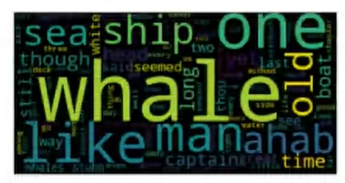

- The following is English stop words list

In [ ]:
nltk_stopwords = {'below', 'that', 'very', 'those', 'some', 'couldn', 'weren', 'were', 'while', 'why', 'are', 'so', 'does', 'should', 'this', 'y', "haven't", 'about', 'and', 'because', 'if', "shan't", "hasn't", 'hasn', 'mightn', 'm', 'her', 'ours', "hadn't", 'haven', 'when', "should've", 'a', 'mustn', 'needn', 'the', "couldn't", "aren't", 'more', "mightn't", 't', 'whom', 'don', 'by', 'am', 'under', 'too', 'did', 'now', 'in', 'can', "shouldn't", 'd', 'how', 'it', 'didn', 'ma', 'herself', 'most', 'further', 'isn', 'myself', "won't", "isn't", 'these', 'into', 'wasn', 're', "you'd", 'who', "needn't", 'after', 'be', 'few', 'here', 'shouldn', 'where', 'of', 'been', 'then', 'ourselves', 'other', 'his', 's', 'again', 'them', "it's", 'o', 'as', 'has', "doesn't", 'had', 'won', 'do', 'being', 'hadn', "that'll", "she's", 'same', 'itself', 'there', "you're", "wouldn't", "you've", 'having', 'out', 'is', 've', 'was', 'doing', 'doesn', 'with', 'i', 'only', "didn't", "mustn't", 'him', 'wouldn', 'all', 'for', 'themselves', 'but', 'theirs', 'nor', 'to', 'from', 'will', 'until', 'they', 'against', 'than', 'down', 'their', 'above', 'off', 'me', 'at', 'shan', 'own', 'just', "you'll", 'an', 'once', 'over', 'aren', 'or', "wasn't", 'its', 'not', 'yours', 'through', 'll', 'on', 'himself', 'he', 'have', 'yourself', 'you', 'which', 'no', 'before', 'each', 'our', 'what', "weren't", 'during', 'she', 'up', 'we', 'your', 'hers', 'my', 'both', 'yourselves', "don't", 'ain', 'any', 'between', 'such'}
stopwords = nltk_stopwords | {'ye', 'upon', 'would', 'must', 'may', 'might', 'thee'}

[('whale', 1228), ('one', 934), ('like', 648), ('man', 527), ('ship', 518), ('ahab', 511), ('sea', 455), ('old', 450), ('though', 384), ('head', 345), ('yet', 345), ('time', 339), ('boat', 336), ('long', 334), ('captain', 329), ('still', 313), ('great', 306), ('said', 304), ('two', 299), ('seemed', 283), ('white', 281), ('last', 279), ('see', 275), ('thou', 271), ('way', 271), ('whales', 268), ('stubb', 257), ('queequeg', 252), ('little', 249), ('round', 247), ('three', 246), ('say', 244), ('men', 244), ('sperm', 244), ('first', 237), ('every', 233), ('us', 232), ('well', 230), ('much', 223), ('good', 217), ('could', 217), ('hand', 214), ('side', 208), ('look', 207), ('ever', 207), ('never', 206), ('starbuck', 198), ('deck', 196), ('go', 195), ('even', 195), ('almost', 195), ('water', 190), ('thing', 188), ('away', 185), ('made', 180), ('come', 179), ('world', 178), ('day', 178), ('sir', 175), ('life', 174), ('chapter', 173), ('pequod', 173), ('among', 171), ('fish', 169), ('many', 166

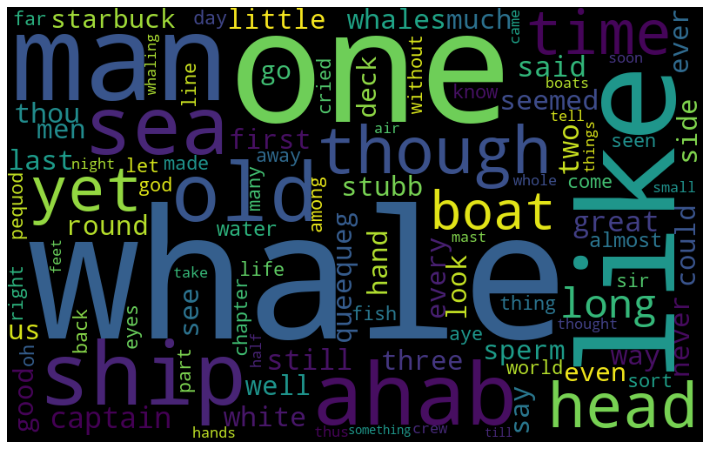

In [ ]:
# YOUR CODE MUST BE HERE
from collections import Counter 
from wordcloud import WordCloud

remove_stopwords_data = [w for w in data if not w in stopwords] #remove stopwords

Counter = Counter(remove_stopwords_data)
most_occur = Counter.most_common(100) #100개 출력
print(most_occur)
wordcloud_dict = dict((x,y) for x, y in most_occur)
#print(wordcloud_dict)

wordcloud = WordCloud(width = 800, height = 500).generate_from_frequencies(wordcloud_dict)
plt.figure(figsize=(15,8))
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

## Problem 2 (20 pts)

- We want to find how many CS faculty members at CS department of Stanford Univ work on CS research areas.
- First, visit https://cs.stanford.edu/research
- Take a look at the source html of the web page.
- We want to scrape data on all the faculty members
- Run the following two cells and see what happens
- If necessary, install html5lib

In [ ]:
from bs4 import BeautifulSoup
import requests

url = "https://cs.stanford.edu/research?items_per_page=All&field_faculty_status_value=active"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

# f = open("stanford_cs.txt", "r")
# text = f.read()
# soup = BeautifulSoup(text, 'html5lib')

## Remark

- Stanford Univ에 너무 많이 접속해서 (DDOS처럼 여겨져서) 접속이 막힐 수도 있음
- 해당 웹페이지를 처음 접속해서 파일로 저장한 다음,
- 파일로 부터 읽어서 숙제를 테스트하는 게 필요함.

In [ ]:
print(soup.tbody.prettify())

### Draw bar charts on research area contributions of Stanford CS faculty

- The followings are research fields
```python
['Architecture', 'Artificial Intelligence', 'Computational Biology', 'Computer Graphics', 'Computer Security', 'Computer Systems', 'Computer Vision', 'Data Science', 'Education', 'Human-Computer Interaction (HCI)', 'Machine Learning', 'Natural Language Processing', 'Networking', 'Operating/Distributed Systems', 'Programming Systems and Verification', 'Robotics', 'Theory']
```

- In plotting, use the following abbreviations:

```
['ARC', 'AI', 'BIO', 'CG', 'SEC', 'SYS', 'VIS', 'DS', 'EDU', 'HCI', 'ML', 'NLP', 'NET', 'ODS', 'PS', 'ROB', 'TH']
```

- For each research area, we want to compute how many professors works on that area.
- If one professor works on n research fields, the contribution to one research field is 1/n.
- The colors for professor ranks (assistant, associate, full professors) may be your own choice.
- Your output should be like:

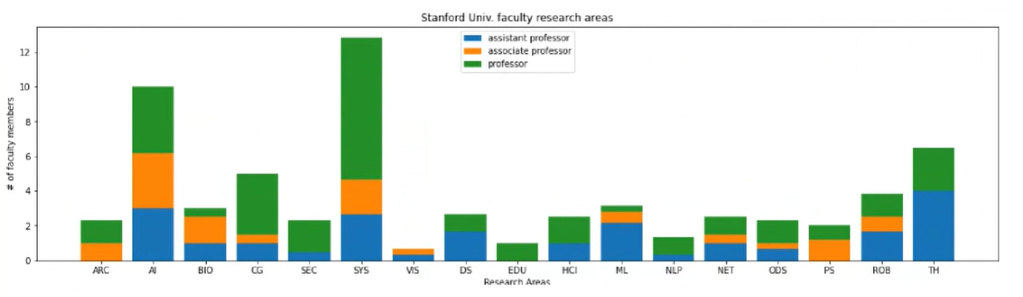

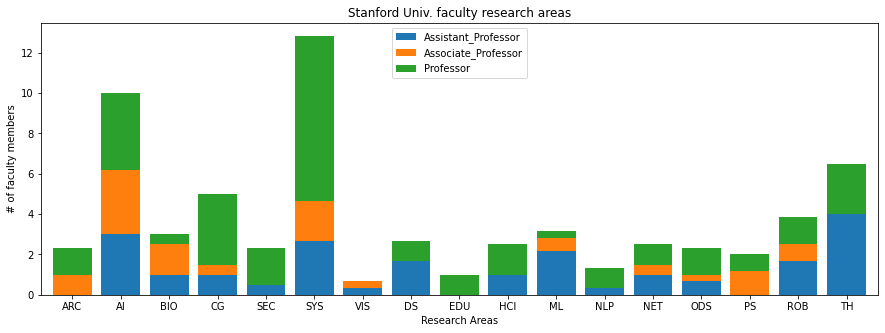

In [ ]:
# YOUR CODE MUST BE HERE
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


arealist = []
facultylist = []

for area in soup.find_all('td', class_="fac_prof_view_focus"):
  #print(area.get_text(strip=True, separator='\n').splitlines())
  arealist.append(area.get_text(strip=True, separator='\n').splitlines())

for faculty in soup.find_all('td', class_="fac_prof_view_title"):
  #print(faculty.get_text(strip=True, separator='\n').splitlines())
  facultylist.append(faculty.get_text(strip=True, separator='\n').splitlines())

#print(arealist)
#print(facultylist)


Assistant_Professor=[0]*17
Associate_Professor=[0]*17
Professor=[0]*17

for i in zip(facultylist, arealist):
  #print(i)
  if i[0] == ['Assistant Professor']:
    for j in range(len(i[1])): #area 개수 만큼 반복
       if i[1][j] == 'Architecture': Assistant_Professor[0] += 1/len(i[1])
       elif i[1][j] == 'Artificial Intelligence': Assistant_Professor[1] += 1/len(i[1])
       elif i[1][j] == 'Computational Biology': Assistant_Professor[2] += 1/len(i[1])
       elif i[1][j] == 'Computer Graphics': Assistant_Professor[3] += 1/len(i[1])
       elif i[1][j] == 'Computer Security': Assistant_Professor[4] += 1/len(i[1])
       elif i[1][j] == 'Computer Systems': Assistant_Professor[5] += 1/len(i[1])
       elif i[1][j] == 'Computer Vision': Assistant_Professor[6] += 1/len(i[1])
       elif i[1][j] == 'Data Science': Assistant_Professor[7] += 1/len(i[1])
       elif i[1][j] == 'Education': Assistant_Professor[8] += 1/len(i[1])
       elif i[1][j] == 'Human-Computer Interaction (HCI)': Assistant_Professor[9] += 1/len(i[1])
       elif i[1][j] == 'Machine Learning': Assistant_Professor[10] += 1/len(i[1])
       elif i[1][j] == 'Natural Language Processing': Assistant_Professor[11] += 1/len(i[1])
       elif i[1][j] == 'Networking': Assistant_Professor[12] += 1/len(i[1])
       elif i[1][j] == 'Operating/Distributed Systems': Assistant_Professor[13] += 1/len(i[1])
       elif i[1][j] == 'Programming Systems and Verification': Assistant_Professor[14] += 1/len(i[1])
       elif i[1][j] == 'Robotics': Assistant_Professor[15] += 1/len(i[1])
       elif i[1][j] == 'Theory': Assistant_Professor[16] += 1/len(i[1])
  elif i[0] == ['Associate Professor']:
    for j in range(len(i[1])): #area 개수 만큼 반복
       if i[1][j] == 'Architecture': Associate_Professor[0] += 1/len(i[1])
       elif i[1][j] == 'Artificial Intelligence': Associate_Professor[1] += 1/len(i[1])
       elif i[1][j] == 'Computational Biology': Associate_Professor[2] += 1/len(i[1])
       elif i[1][j] == 'Computer Graphics': Associate_Professor[3] += 1/len(i[1])
       elif i[1][j] == 'Computer Security': Associate_Professor[4] += 1/len(i[1])
       elif i[1][j] == 'Computer Systems': Associate_Professor[5] += 1/len(i[1])
       elif i[1][j] == 'Computer Vision': Associate_Professor[6] += 1/len(i[1])
       elif i[1][j] == 'Data Science': Associate_Professor[7] += 1/len(i[1])
       elif i[1][j] == 'Education': Associate_Professor[8] += 1/len(i[1])
       elif i[1][j] == 'Human-Computer Interaction (HCI)': Associate_Professor[9] += 1/len(i[1])
       elif i[1][j] == 'Machine Learning': Associate_Professor[10] += 1/len(i[1])
       elif i[1][j] == 'Natural Language Processing': Associate_Professor[11] += 1/len(i[1])
       elif i[1][j] == 'Networking': Associate_Professor[12] += 1/len(i[1])
       elif i[1][j] == 'Operating/Distributed Systems': Associate_Professor[13] += 1/len(i[1])
       elif i[1][j] == 'Programming Systems and Verification': Associate_Professor[14] += 1/len(i[1])
       elif i[1][j] == 'Robotics': Associate_Professor[15] += 1/len(i[1])
       elif i[1][j] == 'Theory': Associate_Professor[16] += 1/len(i[1])
  elif i[0] == ['Professor']:
    for j in range(len(i[1])): #area 개수 만큼 반복
       if i[1][j] == 'Architecture': Professor[0] += 1/len(i[1])
       elif i[1][j] == 'Artificial Intelligence': Professor[1] += 1/len(i[1])
       elif i[1][j] == 'Computational Biology': Professor[2] += 1/len(i[1])
       elif i[1][j] == 'Computer Graphics': Professor[3] += 1/len(i[1])
       elif i[1][j] == 'Computer Security': Professor[4] += 1/len(i[1])
       elif i[1][j] == 'Computer Systems': Professor[5] += 1/len(i[1])
       elif i[1][j] == 'Computer Vision': Professor[6] += 1/len(i[1])
       elif i[1][j] == 'Data Science': Professor[7] += 1/len(i[1])
       elif i[1][j] == 'Education': Professor[8] += 1/len(i[1])
       elif i[1][j] == 'Human-Computer Interaction (HCI)': Professor[9] += 1/len(i[1])
       elif i[1][j] == 'Machine Learning': Professor[10] += 1/len(i[1])
       elif i[1][j] == 'Natural Language Processing': Professor[11] += 1/len(i[1])
       elif i[1][j] == 'Networking': Professor[12] += 1/len(i[1])
       elif i[1][j] == 'Operating/Distributed Systems': Professor[13] += 1/len(i[1])
       elif i[1][j] == 'Programming Systems and Verification': Professor[14] += 1/len(i[1])
       elif i[1][j] == 'Robotics': Professor[15] += 1/len(i[1])
       elif i[1][j] == 'Theory': Professor[16] += 1/len(i[1])


#print('Assistant_Professor',Assistant_Professor)
#print('Associate_Professor',Associate_Professor)
#print('Professor',Professor)


area_list = ['ARC', 'AI', 'BIO', 'CG', 'SEC', 'SYS', 'VIS', 'DS', 'EDU', 'HCI', 'ML', 'NLP', 'NET', 'ODS', 'PS', 'ROB', 'TH']

plotdata = pd.DataFrame({
    "Assistant_Professor":Assistant_Professor,
    "Associate_Professor":Associate_Professor,
    "Professor":Professor
    },
    index = area_list
)

plotdata.plot(kind='bar', figsize=(15,5), width=0.8 ,stacked=True)
plt.title('Stanford Univ. faculty research areas')
plt.xlabel('Research Areas')
plt.ylabel('# of faculty members')
plt.xticks(rotation=0)
plt.legend(loc=9) #upper center
plt.show()

## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit

- Run **all cells** after restarting the kernel
- Goto "File -> Print Preview"
- Print the page as pdf
- Pdf file name must be in a form of: homework_4_홍길동_202200001.pdf
- Submit the pdf file in google classroom
- No late homeworks will be accepted
- Your homework will be graded on the basis of correctness and programming skills